In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df_artilharia = pd.read_csv("goalscorers.csv")
df_results = pd.read_csv("results.csv")
df_penaltis = pd.read_csv("shootouts.csv")

print(df_artilharia.head())
print(df_results.head())
print(df_penaltis.head())


         date  home_team away_team       team            scorer  minute  \
0  1916-07-02      Chile   Uruguay    Uruguay   José Piendibene    44.0   
1  1916-07-02      Chile   Uruguay    Uruguay  Isabelino Gradín    55.0   
2  1916-07-02      Chile   Uruguay    Uruguay  Isabelino Gradín    70.0   
3  1916-07-02      Chile   Uruguay    Uruguay   José Piendibene    75.0   
4  1916-07-06  Argentina     Chile  Argentina     Alberto Ohaco     2.0   

   own_goal  penalty  
0     False    False  
1     False    False  
2     False    False  
3     False    False  
4     False    False  
         date home_team away_team  home_score  away_score tournament     city  \
0  1872-11-30  Scotland   England         0.0         0.0   Friendly  Glasgow   
1  1873-03-08   England  Scotland         4.0         2.0   Friendly   London   
2  1874-03-07  Scotland   England         2.0         1.0   Friendly  Glasgow   
3  1875-03-06   England  Scotland         2.0         2.0   Friendly   London   
4  187

In [ ]:
df_artilharia = df_artilharia.rename(columns={"date":"data","home_team":"time_casa","away_team":"time_visitante","team":"gol_para"})

df_artilharia.head()

,data,time_casa,time_visitante,gol_para,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False


In [ ]:
df_artilharia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44151 entries, 0 to 44150
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   data            44151 non-null  object 
 1   time_casa       44151 non-null  object 
 2   time_visitante  44151 non-null  object 
 3   gol_para        44151 non-null  object 
 4   scorer          44102 non-null  object 
 5   minute          43892 non-null  float64
 6   own_goal        44151 non-null  bool   
 7   penalty         44151 non-null  bool   
dtypes: bool(2), float64(1), object(5)
memory usage: 2.1+ MB


In [ ]:
print(df_artilharia.at[2,"gol_para"])

Uruguay


In [ ]:
import datetime
df_artilharia["data"] = pd.to_datetime(df_artilharia["data"])


In [ ]:
df_filtrado = df_artilharia[df_artilharia["data"] >= "2018-01-01"]

In [ ]:
teste = df_filtrado.groupby(["data","time_casa","time_visitante"])

In [ ]:
df_filtrado

,data,time_casa,time_visitante,gol_para,scorer,minute,own_goal,penalty
37529,2018-05-30,Estonia,Lithuania,Estonia,Henrik Ojamaa,23.0,False,False
37530,2018-05-30,Estonia,Lithuania,Estonia,Mattias Käit,42.0,False,False
37531,2018-06-02,Latvia,Estonia,Latvia,Jānis Ikaunieks,70.0,False,False
37532,2018-06-05,Lithuania,Latvia,Latvia,Kaspars Dubra,46.0,False,False
37533,2018-06-05,Lithuania,Latvia,Lithuania,Karolis Laukžemis,86.0,False,False
...,...,...,...,...,...,...,...,...
44146,2024-06-16,Poland,Netherlands,Netherlands,Cody Gakpo,29.0,False,False
44147,2024-06-16,Poland,Netherlands,Netherlands,Wout Weghorst,83.0,False,False
44148,2024-06-16,Serbia,England,England,Jude Bellingham,13.0,False,False
44149,2024-06-16,Slovenia,Denmark,Denmark,Christian Eriksen,17.0,False,False


In [ ]:
teste_2 = teste.sum()

teste_2.head()

,,,gol_para,scorer,minute,own_goal,penalty
data,time_casa,time_visitante,,,,,
2018-05-30,Estonia,Lithuania,EstoniaEstonia,Henrik OjamaaMattias Käit,65.0,0,0
2018-06-02,Latvia,Estonia,Latvia,Jānis Ikaunieks,70.0,0,0
2018-06-05,Lithuania,Latvia,LatviaLithuania,Kaspars DubraKarolis Laukžemis,132.0,0,0
2018-06-14,Russia,Saudi Arabia,RussiaRussiaRussiaRussiaRussia,Yury GazinskyDenis CheryshevArtem DzyubaDenis ...,306.0,0,0
2018-06-15,Egypt,Uruguay,Uruguay,José María Giménez,89.0,0,0


In [ ]:
#for a,b in teste_2.iterrows():
#  print(b["gol_para"].apply())

#teste_2.index.get_level_values(1)

teste_2.reset_index(inplace=True)



In [ ]:
teste_2

,data,time_casa,time_visitante,gol_para,scorer,minute,own_goal,penalty
0,2018-05-30,Estonia,Lithuania,EstoniaEstonia,Henrik OjamaaMattias Käit,65.0,0,0
1,2018-06-02,Latvia,Estonia,Latvia,Jānis Ikaunieks,70.0,0,0
2,2018-06-05,Lithuania,Latvia,LatviaLithuania,Kaspars DubraKarolis Laukžemis,132.0,0,0
3,2018-06-14,Russia,Saudi Arabia,RussiaRussiaRussiaRussiaRussia,Yury GazinskyDenis CheryshevArtem DzyubaDenis ...,306.0,0,0
4,2018-06-15,Egypt,Uruguay,Uruguay,José María Giménez,89.0,0,0
...,...,...,...,...,...,...,...,...
2260,2024-06-15,Italy,Albania,AlbaniaItalyItaly,Nedim BajramiAlessandro BastoniNicolò Barella,28.0,0,0
2261,2024-06-15,Spain,Croatia,SpainSpainSpain,Álvaro MorataFabián RuizDani Carvajal,106.0,0,0
2262,2024-06-16,Poland,Netherlands,PolandNetherlandsNetherlands,Adam BuksaCody GakpoWout Weghorst,128.0,0,0
2263,2024-06-16,Serbia,England,England,Jude Bellingham,13.0,0,0


In [ ]:
for a,b in teste_2.iterrows():
  b["gol_casa"] = b["gol_para"].count(b["time_casa"])

  #print(b["gol_para"].count(b["time_casa"]))
  #print(b["gol_para"].count(b["time_visitante"]))

#def count_goals(row):
#  return row["gol_para"].count(row["time_casa"])
teste_2
#def count_go(row):
#  return row["gol_para"].count(row["time_visitante"])

#teste_2["gol_para"].apply(count_go)

,data,time_casa,time_visitante,gol_para,scorer,minute,own_goal,penalty
0,2018-05-30,Estonia,Lithuania,EstoniaEstonia,Henrik OjamaaMattias Käit,65.0,0,0
1,2018-06-02,Latvia,Estonia,Latvia,Jānis Ikaunieks,70.0,0,0
2,2018-06-05,Lithuania,Latvia,LatviaLithuania,Kaspars DubraKarolis Laukžemis,132.0,0,0
3,2018-06-14,Russia,Saudi Arabia,RussiaRussiaRussiaRussiaRussia,Yury GazinskyDenis CheryshevArtem DzyubaDenis ...,306.0,0,0
4,2018-06-15,Egypt,Uruguay,Uruguay,José María Giménez,89.0,0,0
...,...,...,...,...,...,...,...,...
2260,2024-06-15,Italy,Albania,AlbaniaItalyItaly,Nedim BajramiAlessandro BastoniNicolò Barella,28.0,0,0
2261,2024-06-15,Spain,Croatia,SpainSpainSpain,Álvaro MorataFabián RuizDani Carvajal,106.0,0,0
2262,2024-06-16,Poland,Netherlands,PolandNetherlandsNetherlands,Adam BuksaCody GakpoWout Weghorst,128.0,0,0
2263,2024-06-16,Serbia,England,England,Jude Bellingham,13.0,0,0


In [ ]:
def count_goals(row):
  return row["gol_para"].count(row["time_casa"])

def count_goals_visit(row):
  return row["gol_para"].count(row["time_visitante"])

teste_2['gol_casa'] = teste_2.apply(count_goals, axis=1)
teste_2['gol_visit'] = teste_2.apply(count_goals_visit, axis=1)
teste_2.head()

,data,time_casa,time_visitante,gol_para,scorer,minute,own_goal,penalty,gol_casa,gol_visit
0,2018-05-30,Estonia,Lithuania,EstoniaEstonia,Henrik OjamaaMattias Käit,65.0,0,0,2,0
1,2018-06-02,Latvia,Estonia,Latvia,Jānis Ikaunieks,70.0,0,0,1,0
2,2018-06-05,Lithuania,Latvia,LatviaLithuania,Kaspars DubraKarolis Laukžemis,132.0,0,0,1,1
3,2018-06-14,Russia,Saudi Arabia,RussiaRussiaRussiaRussiaRussia,Yury GazinskyDenis CheryshevArtem DzyubaDenis ...,306.0,0,0,5,0
4,2018-06-15,Egypt,Uruguay,Uruguay,José María Giménez,89.0,0,0,0,1


In [ ]:
df_artilharia.head()

df_artilharia.groupby("gol_para").count()

,data,time_casa,time_visitante,scorer,minute,own_goal,penalty
gol_para,,,,,,,
Afghanistan,15,15,15,15,15,15,15
Albania,196,196,196,196,196,196,196
Algeria,260,260,260,260,260,260,260
American Samoa,10,10,10,10,10,10,10
Andorra,48,48,48,48,48,48,48
...,...,...,...,...,...,...,...
Yemen,58,58,58,58,58,58,58
Yemen DPR,4,4,4,4,4,4,4
Yugoslavia,314,314,314,314,314,314,314


In [ ]:
df_artilharia.head()

,data,time_casa,time_visitante,gol_para,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False


In [ ]:
df_artilharia.loc[df_artilharia["minute"] == 85].iloc[3:,1:4]

,time_casa,time_visitante,gol_para
358,Argentina,Uruguay,Argentina
390,Germany,Switzerland,Germany
423,Spain,Mexico,Spain
458,Netherlands,Belgium,Belgium
517,Estonia,Lithuania,Estonia
...,...,...,...
43863,Japan,Vietnam,Japan
43881,Malaysia,Jordan,Jordan
43983,Gambia,Cameroon,Gambia
44091,Bosnia and Herzegovina,Ukraine,Ukraine


In [ ]:
colun = ['own_goal','penalty']

aa = df_artilharia[colun].replace({False:0,True:1})
aa["own_goal"].value_counts()
print(f'ANTES {df_artilharia.shape}')

indexes = aa.loc[aa["own_goal"] == 1].index
print(indexes)

df_artilharia.drop(indexes, inplace=True)
df_artilharia.head()

print(f'DEPOIS {df_artilharia.shape}')


print(df_artilharia)

ANTES (44151, 8)
Index([   28,    48,   143,   336,   358,   558,  1107,  1135,  1217,  1437,
       ...
       43984, 44003, 44020, 44040, 44052, 44064, 44090, 44099, 44108, 44133],
      dtype='int64', length=809)
DEPOIS (43342, 8)
            data  time_casa time_visitante     gol_para             scorer  \
0     1916-07-02      Chile        Uruguay      Uruguay    José Piendibene   
1     1916-07-02      Chile        Uruguay      Uruguay   Isabelino Gradín   
2     1916-07-02      Chile        Uruguay      Uruguay   Isabelino Gradín   
3     1916-07-02      Chile        Uruguay      Uruguay    José Piendibene   
4     1916-07-06  Argentina          Chile    Argentina      Alberto Ohaco   
...          ...        ...            ...          ...                ...   
44146 2024-06-16     Poland    Netherlands  Netherlands         Cody Gakpo   
44147 2024-06-16     Poland    Netherlands  Netherlands      Wout Weghorst   
44148 2024-06-16     Serbia        England      England    Jude 

In [ ]:
#df_artilharia.drop(["minute"],axis=1,inplace=True)
df_artilharia.head()

#df_artilharia.drop(1, axis=0, inplace=True)
df_artilharia.head()


,data,time_casa,time_visitante,gol_para,scorer,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,False,False
5,1916-07-06,Argentina,Chile,Chile,Telésforo Báez,False,False


tratamento dados vazios
group by

In [ ]:
df_penaltis['winner'].value_counts()

df_results.head()

grupo = df_results.groupby('tournament').sum()
grupo[["away_score","home_score"]].head()

,away_score,home_score
tournament,,
ABCS Tournament,31.0,43.0
AFC Asian Cup,489.0,630.0
AFC Asian Cup qualification,816.0,1720.0
AFC Challenge Cup,124.0,142.0
AFC Challenge Cup qualification,105.0,175.0


In [ ]:
df_artilharia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44151 entries, 0 to 44150
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       44151 non-null  object 
 1   home_team  44151 non-null  object 
 2   away_team  44151 non-null  object 
 3   team       44151 non-null  object 
 4   scorer     44102 non-null  object 
 5   minute     43892 non-null  float64
 6   own_goal   44151 non-null  bool   
 7   penalty    44151 non-null  bool   
dtypes: bool(2), float64(1), object(5)
memory usage: 2.1+ MB


In [ ]:
df_artilharia[df_artilharia.isnull().any(axis=1)]

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
3347,1960-10-16,Taiwan,Vietnam Republic,Taiwan,Yiu Cheuk Yin,NaN,False,False
4059,1963-11-26,Ghana,Ethiopia,Ghana,Edward Acquah,NaN,False,False
4060,1963-11-26,Ghana,Ethiopia,Ghana,Edward Acquah,NaN,False,False
4063,1963-11-28,Ethiopia,Tunisia,Ethiopia,Mengistu Worku,NaN,False,False
4064,1963-11-28,Ethiopia,Tunisia,Ethiopia,Mengistu Worku,NaN,False,False
...,...,...,...,...,...,...,...,...
16812,1997-03-27,Saudi Arabia,Bangladesh,Saudi Arabia,Abdullah Al-Dosari,NaN,False,False
16838,1997-03-29,Taiwan,Bangladesh,Taiwan,Hsu Te Ming,NaN,False,False
16839,1997-03-29,Taiwan,Bangladesh,Bangladesh,Alfaz Ahmed,NaN,False,False
16840,1997-03-29,Taiwan,Bangladesh,Bangladesh,Imtiaz Ahmed Nakib,NaN,False,False


In [ ]:
aa = df_artilharia[df_artilharia.isnull().any(axis=1)]

In [ ]:
bb = df_artilharia[df_artilharia["scorer"].isnull()].index

In [ ]:
bb

Index([8697, 8698, 8699, 8700, 8701, 8702, 8703, 8704, 8705, 8706, 8707, 8725,
       8726, 8727, 8728, 8729, 8730, 8731, 8744, 8745, 8746, 8747, 8748, 8749,
       8750, 8751, 8752, 8753, 8754, 8755, 8756, 8758, 8759, 8760, 8761, 8762,
       8763, 8764, 8765, 8766, 8767, 8768, 8769, 8770, 8771, 8772, 8773, 8774,
       8978],
      dtype='int64')

In [ ]:
aa["scorer"].fillna("Cara aleatorio", inplace=True)

o = aa.loc[aa["scorer"] == 'Cara aleatorio']

o

<ipython-input-76-948a0fb2b8ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aa["scorer"].fillna("Cara aleatorio", inplace=True)


,date,home_team,away_team,team,scorer,minute,own_goal,penalty
8697,1980-02-24,Vanuatu,Papua New Guinea,Papua New Guinea,Cara aleatorio,NaN,False,False
8698,1980-02-24,Vanuatu,Papua New Guinea,Papua New Guinea,Cara aleatorio,NaN,False,False
8699,1980-02-24,Vanuatu,Papua New Guinea,Papua New Guinea,Cara aleatorio,NaN,False,False
8700,1980-02-24,Vanuatu,Papua New Guinea,Papua New Guinea,Cara aleatorio,NaN,False,False
8701,1980-02-24,Vanuatu,Papua New Guinea,Vanuatu,Cara aleatorio,NaN,False,False
8702,1980-02-24,Vanuatu,Papua New Guinea,Vanuatu,Cara aleatorio,NaN,False,False
8703,1980-02-24,Vanuatu,Papua New Guinea,Vanuatu,Cara aleatorio,NaN,False,False
8704,1980-02-25,Fiji,Solomon Islands,Fiji,Cara aleatorio,NaN,False,False
8705,1980-02-25,Fiji,Solomon Islands,Fiji,Cara aleatorio,NaN,False,False
8706,1980-02-25,Fiji,Solomon Islands,Fiji,Cara aleatorio,NaN,False,False


In [ ]:
o2 = o
o.iloc[0,o.columns.get_loc('minute')] = 40
display(o)

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
8697,1980-02-24,Vanuatu,Papua New Guinea,Papua New Guinea,Cara aleatorio,40.0,False,False
8698,1980-02-24,Vanuatu,Papua New Guinea,Papua New Guinea,Cara aleatorio,NaN,False,False
8699,1980-02-24,Vanuatu,Papua New Guinea,Papua New Guinea,Cara aleatorio,NaN,False,False
8700,1980-02-24,Vanuatu,Papua New Guinea,Papua New Guinea,Cara aleatorio,NaN,False,False
8701,1980-02-24,Vanuatu,Papua New Guinea,Vanuatu,Cara aleatorio,NaN,False,False
8702,1980-02-24,Vanuatu,Papua New Guinea,Vanuatu,Cara aleatorio,NaN,False,False
8703,1980-02-24,Vanuatu,Papua New Guinea,Vanuatu,Cara aleatorio,NaN,False,False
8704,1980-02-25,Fiji,Solomon Islands,Fiji,Cara aleatorio,NaN,False,False
8705,1980-02-25,Fiji,Solomon Islands,Fiji,Cara aleatorio,NaN,False,False
8706,1980-02-25,Fiji,Solomon Islands,Fiji,Cara aleatorio,NaN,False,False


In [ ]:
o = o.ffill()

In [ ]:
o["minute"].mean()

o2



,date,home_team,away_team,team,scorer,minute,own_goal,penalty
8697,1980-02-24,Vanuatu,Papua New Guinea,Papua New Guinea,Cara aleatorio,40.0,False,False
8698,1980-02-24,Vanuatu,Papua New Guinea,Papua New Guinea,Cara aleatorio,NaN,False,False
8699,1980-02-24,Vanuatu,Papua New Guinea,Papua New Guinea,Cara aleatorio,NaN,False,False
8700,1980-02-24,Vanuatu,Papua New Guinea,Papua New Guinea,Cara aleatorio,NaN,False,False
8701,1980-02-24,Vanuatu,Papua New Guinea,Vanuatu,Cara aleatorio,NaN,False,False
8702,1980-02-24,Vanuatu,Papua New Guinea,Vanuatu,Cara aleatorio,NaN,False,False
8703,1980-02-24,Vanuatu,Papua New Guinea,Vanuatu,Cara aleatorio,NaN,False,False
8704,1980-02-25,Fiji,Solomon Islands,Fiji,Cara aleatorio,NaN,False,False
8705,1980-02-25,Fiji,Solomon Islands,Fiji,Cara aleatorio,NaN,False,False
8706,1980-02-25,Fiji,Solomon Islands,Fiji,Cara aleatorio,NaN,False,False


In [ ]:
o2.fillna(o["minute"].mean(),inplace=True)

o2

<ipython-input-82-1f650a334322>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  o2.fillna(o["minute"].mean(),inplace=True)


,date,home_team,away_team,team,scorer,minute,own_goal,penalty
8697,1980-02-24,Vanuatu,Papua New Guinea,Papua New Guinea,Cara aleatorio,40.000000,False,False
8698,1980-02-24,Vanuatu,Papua New Guinea,Papua New Guinea,Cara aleatorio,40.244898,False,False
8699,1980-02-24,Vanuatu,Papua New Guinea,Papua New Guinea,Cara aleatorio,40.244898,False,False
8700,1980-02-24,Vanuatu,Papua New Guinea,Papua New Guinea,Cara aleatorio,40.244898,False,False
8701,1980-02-24,Vanuatu,Papua New Guinea,Vanuatu,Cara aleatorio,40.244898,False,False
8702,1980-02-24,Vanuatu,Papua New Guinea,Vanuatu,Cara aleatorio,40.244898,False,False
8703,1980-02-24,Vanuatu,Papua New Guinea,Vanuatu,Cara aleatorio,40.244898,False,False
8704,1980-02-25,Fiji,Solomon Islands,Fiji,Cara aleatorio,40.244898,False,False
8705,1980-02-25,Fiji,Solomon Islands,Fiji,Cara aleatorio,40.244898,False,False
8706,1980-02-25,Fiji,Solomon Islands,Fiji,Cara aleatorio,40.244898,False,False


In [ ]:
df_artilharia.isnull().sum()

date           0
home_team      0
away_team      0
team           0
scorer        49
minute       259
own_goal       0
penalty        0
dtype: int64

In [ ]:
df_fifa = pd.read_csv("fifa.csv")
df_fifa

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",NaN,2026,189cm,82kg,€157M,8.0,NaN
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,Yes,"<span class=""pos pos15"">LCM","Jan 30, 2020",NaN,2026,179cm,69kg,€155M,8.0,NaN
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,No,"<span class=""pos pos7"">LB","Sep 14, 2020",NaN,2024,172cm,69kg,€97.7M,19.0,NaN
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",NaN,2025,181cm,70kg,€198.9M,17.0,NaN
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,Yes,"<span class=""pos pos13"">RCM","Sep 1, 2020",NaN,2026,172cm,68kg,€154.4M,23.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17655,269526,Deng Xiongtao,19,https://cdn.sofifa.net/players/269/526/23_60.png,China PR,https://cdn.sofifa.net/flags/cn.png,48,61,Meizhou Hakka,https://cdn.sofifa.net/teams/114628/30.png,...,No,"<span class=""pos pos29"">RES","Apr 11, 2022",NaN,2027,190cm,78kg,€218K,35.0,NaN
17656,267946,22 Lim Jun Sub,17,https://cdn.sofifa.net/players/267/946/22_60.png,Korea Republic,https://cdn.sofifa.net/flags/kr.png,48,64,Jeju United FC,https://cdn.sofifa.net/teams/1478/30.png,...,No,"<span class=""pos pos29"">RES","Jan 1, 2022",NaN,2026,195cm,84kg,€188K,21.0,NaN
17657,270567,A. Demir,25,https://cdn.sofifa.net/players/270/567/23_60.png,Turkey,https://cdn.sofifa.net/flags/tr.png,51,56,Ümraniyespor,https://cdn.sofifa.net/teams/113796/30.png,...,No,"<span class=""pos pos29"">RES","Jun 6, 2021",NaN,2023,190cm,82kg,€142K,12.0,NaN
17658,256624,21 S. Czajor,18,https://cdn.sofifa.net/players/256/624/21_60.png,Poland,https://cdn.sofifa.net/flags/pl.png,50,65,Fleetwood Town,https://cdn.sofifa.net/teams/112260/30.png,...,No,"<span class=""pos pos29"">RES","Jan 1, 2020",NaN,2021,187cm,79kg,€214K,40.0,NaN


In [ ]:
ai = df_fifa[["Club","Overall","Potential"]].groupby("Club").mean()

ai.loc[ai["Potential"] == ai["Potential"]]

df_fifa.loc[(df_fifa["Potential"] > 85) & (df_fifa["Overall"] < 70)]

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
2229,262842,M. Baturina,19,https://cdn.sofifa.net/players/262/842/23_60.png,Croatia,https://cdn.sofifa.net/flags/hr.png,69,86,Dinamo Zagreb,https://cdn.sofifa.net/teams/211/30.png,...,No,"<span class=""pos pos28"">SUB","Feb 14, 2021",NaN,2027,172cm,68kg,€10.2M,10.0,NaN
4061,267680,A. Fatawu Issahaku,18,https://cdn.sofifa.net/players/267/680/23_60.png,Ghana,https://cdn.sofifa.net/flags/gh.png,67,86,Sporting CP,https://cdn.sofifa.net/teams/237/30.png,...,No,"<span class=""pos pos28"">SUB","Jul 1, 2022",NaN,2027,177cm,73kg,€6.8M,18.0,NaN
4301,240833,Y. Moukoko,17,https://cdn.sofifa.net/players/240/833/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,69,88,Borussia Dortmund,https://cdn.sofifa.net/teams/22/30.png,...,Yes,"<span class=""pos pos28"">SUB","Nov 20, 2020",NaN,2023,175cm,73kg,€8.1M,18.0,NaN
4543,264309,22 A. Güler,16,https://cdn.sofifa.net/players/264/309/22_60.png,Turkey,https://cdn.sofifa.net/flags/tr.png,66,86,Fenerbahçe SK,https://cdn.sofifa.net/teams/326/30.png,...,No,"<span class=""pos pos28"">SUB","Jul 13, 2021",NaN,2025,176cm,61kg,€6.7M,25.0,NaN
5332,259356,C. Chukwuemeka,18,https://cdn.sofifa.net/players/259/356/23_60.png,England,https://cdn.sofifa.net/flags/gb-eng.png,64,86,Chelsea,https://cdn.sofifa.net/teams/5/30.png,...,Yes,"<span class=""pos pos29"">RES","Aug 2, 2022",NaN,2028,185cm,70kg,€5.4M,30.0,NaN
6327,258467,L. Romero,17,https://cdn.sofifa.net/players/258/467/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,67,86,Lazio,https://cdn.sofifa.net/teams/46/30.png,...,No,"<span class=""pos pos29"">RES","Jul 20, 2021",NaN,2024,166cm,64kg,€5.8M,18.0,NaN
7743,266032,J. Bynoe-Gittens,17,https://cdn.sofifa.net/players/266/032/23_60.png,England,https://cdn.sofifa.net/flags/gb-eng.png,67,87,Borussia Dortmund,https://cdn.sofifa.net/teams/22/30.png,...,No,"<span class=""pos pos28"">SUB","Apr 8, 2022",NaN,2026,175cm,70kg,€7.6M,43.0,NaN
8408,262053,Kayky,19,https://cdn.sofifa.net/players/262/053/23_60.png,Brazil,https://cdn.sofifa.net/flags/br.png,66,86,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,No,"<span class=""pos pos28"">SUB","Aug 26, 2021",NaN,2026,175cm,67kg,€6.8M,37.0,NaN


Axes(0.125,0.11;0.775x0.77)


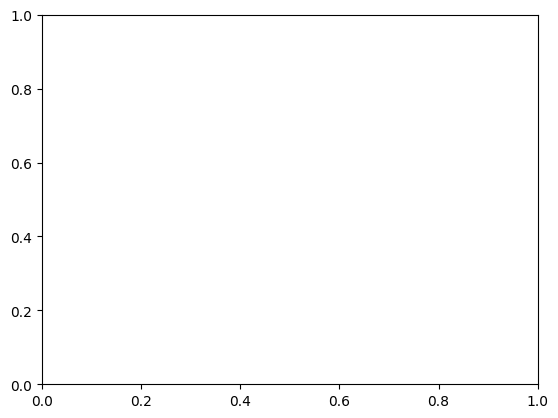

In [ ]:
fig, ax = plt.subplots()


fig
print(ax)

In [ ]:
df_fifa["Real Face"].value_counts()

Real Face
No     15576
Yes     2046
Name: count, dtype: int64

In [ ]:
#counts = df_fifa["Real Face"].value_counts()
#plt.bar(counts.index, counts.values)

print(df_fifa["Contract Valid Until"].value_counts().index)

Index(['2023', '2024', '2022', '2025', '2026', '2021', 'Jun 30, 2023', '2027',
       '2020', 'Jun 30, 2022', 'Dec 31, 2022', '2019', '2018', '2017', '2015',
       '2014', '2016', 'Jun 30, 2021', '2013', 'Dec 31, 2023', '2009', '2028',
       '2012', '2011', '2010', '2007', '2008', 'Nov 30, 2022', 'Jun 30, 2024',
       'Jun 30, 2020', 'May 31, 2022', 'May 31, 2023', 'Jan 31, 2023',
       'Jan 1, 2023', 'Dec 31, 2021', 'Sep 6, 2022', 'Jun 30, 2018',
       'Jan 3, 2023', 'Jun 30, 2019', 'Dec 1, 2022', 'Jun 30, 2017',
       'Jun 30, 2014', 'Jan 31, 2022', 'Dec 30, 2023', 'Jun 26, 2023',
       'Dec 31, 2013', '2031', 'Jan 8, 2023'],
      dtype='object', name='Contract Valid Until')


In [ ]:
df_temp = df_fifa.loc[df_fifa["Overall"] >= 75]

df_temp


,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",NaN,2026,189cm,82kg,€157M,8.0,NaN
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,Yes,"<span class=""pos pos15"">LCM","Jan 30, 2020",NaN,2026,179cm,69kg,€155M,8.0,NaN
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,No,"<span class=""pos pos7"">LB","Sep 14, 2020",NaN,2024,172cm,69kg,€97.7M,19.0,NaN
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",NaN,2025,181cm,70kg,€198.9M,17.0,NaN
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,Yes,"<span class=""pos pos13"">RCM","Sep 1, 2020",NaN,2026,172cm,68kg,€154.4M,23.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16266,2196,18 R. Weidenfeller,36,https://cdn.sofifa.net/players/002/196/18_60.png,Germany,https://cdn.sofifa.net/flags/de.png,75,75,Borussia Dortmund,https://cdn.sofifa.net/teams/22/30.png,...,Yes,"<span class=""pos pos28"">SUB","Jul 28, 2002",NaN,2018,190cm,90kg,€1.5M,1.0,NaN
16322,263286,A. Mandous,30,https://cdn.sofifa.net/players/263/286/23_60.png,Czech Republic,https://cdn.sofifa.net/flags/cz.png,75,75,SK Slavia Praha,https://cdn.sofifa.net/teams/266/30.png,...,No,"<span class=""pos pos0"">GK","Jul 12, 2021",NaN,2026,188cm,85kg,€8.1M,28.0,NaN
16361,244385,G. Bushchan,28,https://cdn.sofifa.net/players/244/385/23_60.png,Ukraine,https://cdn.sofifa.net/flags/ua.png,75,78,Dynamo Kyiv,https://cdn.sofifa.net/teams/101047/30.png,...,No,"<span class=""pos pos0"">GK",NaN,NaN,NaN,196cm,84kg,€11.4M,1.0,NaN
16449,1492,07 G. Warmuz,36,https://cdn.sofifa.net/players/001/492/07_60.png,France,https://cdn.sofifa.net/flags/fr.png,76,78,AS Monaco,https://cdn.sofifa.net/teams/69/30.png,...,NaN,"<span class=""pos pos28"">SUB",NaN,NaN,2007,187cm,85kg,NaN,1.0,NaN


In [ ]:
pp = df_temp["Overall"].value_counts()

<BarContainer object of 17 artists>

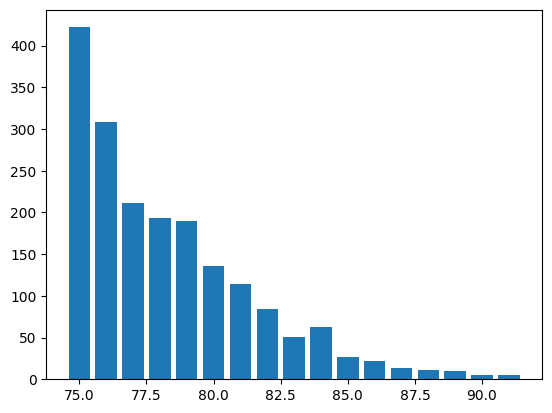

In [ ]:


plt.bar(pp.index, pp)

In [ ]:
df_tott = df_fifa.loc[df_fifa["Club"] == "Tottenham Hotspur"]

In [ ]:
df_tott

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
16,181458,I. Perišić,33,https://cdn.sofifa.net/players/181/458/23_60.png,Croatia,https://cdn.sofifa.net/flags/hr.png,84,84,Tottenham Hotspur,https://cdn.sofifa.net/teams/18/30.png,...,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2022",NaN,2024,186cm,80kg,€50.4M,14.0,NaN
52,202126,H. Kane,28,https://cdn.sofifa.net/players/202/126/23_60.png,England,https://cdn.sofifa.net/flags/gb-eng.png,89,89,Tottenham Hotspur,https://cdn.sofifa.net/teams/18/30.png,...,Yes,"<span class=""pos pos25"">ST","Jul 28, 2010",NaN,2024,188cm,89kg,€200.5M,10.0,NaN
97,226226,G. Lo Celso,26,https://cdn.sofifa.net/players/226/226/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,81,83,Tottenham Hotspur,https://cdn.sofifa.net/teams/18/30.png,...,Yes,"<span class=""pos pos29"">RES","Jul 27, 2020",NaN,2025,177cm,68kg,€62.2M,18.0,NaN
135,200104,H. Son,29,https://cdn.sofifa.net/players/200/104/23_60.png,Korea Republic,https://cdn.sofifa.net/flags/kr.png,89,89,Tottenham Hotspur,https://cdn.sofifa.net/teams/18/30.png,...,Yes,"<span class=""pos pos27"">LW","Aug 28, 2015",NaN,2025,183cm,78kg,€191.9M,7.0,NaN
145,236480,Y. Bissouma,25,https://cdn.sofifa.net/players/236/480/23_60.png,Mali,https://cdn.sofifa.net/flags/ml.png,81,86,Tottenham Hotspur,https://cdn.sofifa.net/teams/18/30.png,...,Yes,"<span class=""pos pos28"">SUB","Jun 17, 2022",NaN,2026,182cm,80kg,€68.1M,38.0,NaN
212,231943,Richarlison,25,https://cdn.sofifa.net/players/231/943/23_60.png,Brazil,https://cdn.sofifa.net/flags/br.png,81,84,Tottenham Hotspur,https://cdn.sofifa.net/teams/18/30.png,...,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2022",NaN,2027,181cm,71kg,€68.1M,9.0,NaN
217,213648,P. Højbjerg,26,https://cdn.sofifa.net/players/213/648/23_60.png,Denmark,https://cdn.sofifa.net/flags/dk.png,83,85,Tottenham Hotspur,https://cdn.sofifa.net/teams/18/30.png,...,Yes,"<span class=""pos pos15"">LCM","Aug 11, 2020",NaN,2025,187cm,84kg,€80M,5.0,NaN
222,227535,R. Bentancur,25,https://cdn.sofifa.net/players/227/535/23_60.png,Uruguay,https://cdn.sofifa.net/flags/uy.png,79,83,Tottenham Hotspur,https://cdn.sofifa.net/teams/18/30.png,...,No,"<span class=""pos pos13"">RCM","Jan 31, 2022",NaN,2026,187cm,73kg,€48.4M,30.0,NaN
276,247394,D. Kulusevski,22,https://cdn.sofifa.net/players/247/394/23_60.png,Sweden,https://cdn.sofifa.net/flags/se.png,81,87,Tottenham Hotspur,https://cdn.sofifa.net/teams/18/30.png,...,Yes,"<span class=""pos pos23"">RW",NaN,"<a href=""/team/45/juventus/"">Juventus</a>","Jun 30, 2023",186cm,75kg,NaN,21.0,NaN
282,200949,Lucas Moura,29,https://cdn.sofifa.net/players/200/949/23_60.png,Brazil,https://cdn.sofifa.net/flags/br.png,80,80,Tottenham Hotspur,https://cdn.sofifa.net/teams/18/30.png,...,Yes,"<span class=""pos pos28"">SUB","Jan 31, 2018",NaN,2024,174cm,70kg,€39M,27.0,NaN


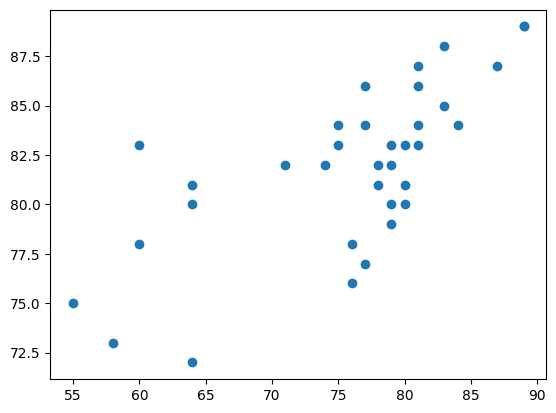

In [ ]:
fig, ax = plt.subplots()

plt.scatter(df_tott["Overall"], df_tott["Potential"])

In [ ]:
Q1_p = df_fifa['Age'].describe()


In [ ]:
Q1_p

count    17660.000000
mean        23.127746
std          4.639821
min         15.000000
25%         20.000000
50%         22.000000
75%         26.000000
max         54.000000
Name: Age, dtype: float64

In [ ]:
df_artilharia.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False


In [ ]:
minute_counts = df_artilharia['minute'].value_counts().sort_index()


In [ ]:
minute_counts

minute
1.0      199
2.0      341
3.0      322
4.0      355
5.0      384
        ... 
117.0      7
118.0      9
119.0      8
120.0     12
122.0      1
Name: count, Length: 121, dtype: int64

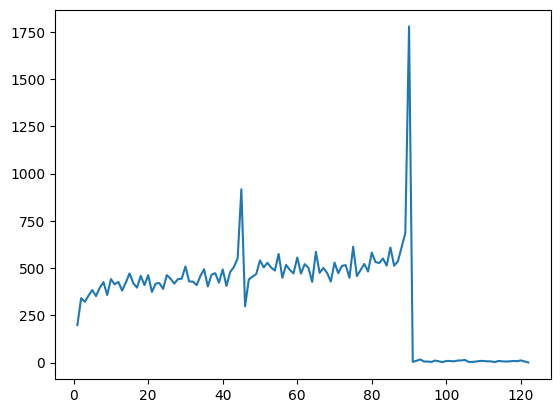

In [ ]:
plt.plot(minute_counts.index,minute_counts)


In [ ]:
import numpy as np

# Configurar a semente aleatória para reprodutibilidade
np.random.seed(42)

# Gerar dados normais
data = {
    'A': np.random.normal(loc=50, scale=10, size=45).tolist(),
    'B': np.random.normal(loc=100, scale=20, size=45).tolist(),
    'C': np.random.normal(loc=150, scale=30, size=45).tolist()
}

In [ ]:
df_data = pd.DataFrame(data)

In [ ]:
df_data.describe()

,A,B,C
count,45.000000,45.000000,45.000000
mean,47.837575,100.372522,148.067638
std,9.302806,18.702882,28.774722
min,30.403299,47.605098,92.436864
25%,40.919759,89.634596,128.938407
50%,47.658630,101.740941,148.958647
75%,53.142473,116.250516,159.046420
max,68.522782,131.292873,223.897263


In [ ]:
dd = df_data.quantile(0.90) * 1.5

oi = df_data.loc[df_data["A"] > dd["A"]].index

print(oi)

df_data

Index([3, 6, 20, 31, 34], dtype='int64')


,A,B,C
0,54.967142,85.603116,152.912326
1,48.617357,90.787225,179.059350
2,56.476885,121.142445,128.938407
3,65.230299,106.872366,140.170136
4,47.658466,64.739197,138.236755
5,47.658630,106.481679,106.094552
6,65.792128,92.298354,158.883608
7,57.674347,86.461560,157.831658
8,45.305256,112.233526,150.153404
9,55.425600,120.619990,142.962386


In [ ]:
# Identificar outliers com base no limiar calculado
outliers = df_data[(df_data['B'] > dd).any(axis=1)]

# Exibir os outliers
print(outliers)


ValueError: Can only compare identically-labeled Series objects

In [ ]:
p90 = df_data.quantile(0.90)

df_new = df_data.drop(df_data[df_data["A"] > p90["A"]].index)

In [ ]:
df_new

,A,B,C
0,54.967142,85.603116,152.912326
1,48.617357,90.787225,179.059350
2,56.476885,121.142445,128.938407
4,47.658466,64.739197,138.236755
5,47.658630,106.481679,106.094552
7,57.674347,86.461560,157.831658
8,45.305256,112.233526,150.153404
9,55.425600,120.619990,142.962386
10,45.365823,118.625602,107.538878
11,45.342702,83.215650,137.380640


In [ ]:
p90["A"]

58.00500838923077

In [ ]:
df_data.drop(oi)

,A,B,C
0,54.967142,85.603116,152.912326
1,48.617357,90.787225,179.059350
2,56.476885,121.142445,128.938407
4,47.658466,64.739197,138.236755
5,47.658630,106.481679,106.094552
7,57.674347,86.461560,157.831658
8,45.305256,112.233526,150.153404
9,55.425600,120.619990,142.962386
10,45.365823,118.625602,107.538878
11,45.342702,83.215650,137.380640


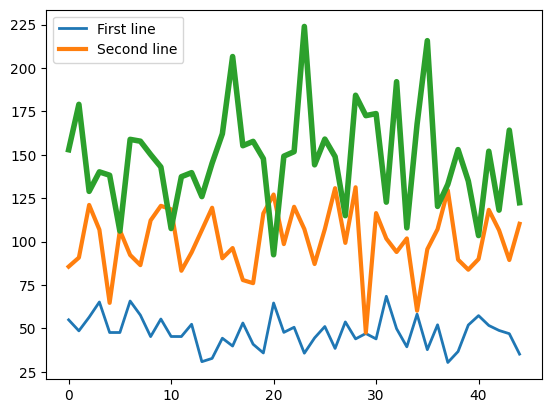

In [ ]:
fig, ax = plt.subplots()

ax.plot(df_data['A'], linewidth=2.0)
ax.plot(df_data['B'], linewidth=3.0)
ax.plot(df_data['C'], linewidth=4.0)

ax.legend(['First line', 'Second line'])
